# **Assignment 1, classification task**
### Ostapovich Oleg

### Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from functions import *
import matplotlib.pyplot as plt

In [3]:
#loading data
stream_quality_df = pd.read_csv('stream_quality_data/train_data.csv')
stream_quality_test = pd.read_csv('stream_quality_data/test_data.csv')

In [4]:
stream_quality_df.head()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0


In [5]:
# Data preprocessing at labels
stream_quality_df, stream_quality_test = LabelEncoderforClassification(stream_quality_df,stream_quality_test)

In [6]:
stream_quality_df.head() #here what happened with data

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,1,1,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,1,1,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,1,1,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,1,1,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,1,1,50.0,0


In [7]:
# Data preprocessing at numerical data
stream_quality_df, stream_quality_test = NumericalEncoderforClassification(stream_quality_df,stream_quality_test)

In [8]:
stream_quality_df.head() #here what happened with data

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,0.191975,0.001652,0.0,0.007063,0.000165,0.0,0.0,0.0,1,1,0.2,0
1,0.225020,0.006609,0.0,0.007730,0.000391,0.0,0.0,0.0,1,1,0.2,0
2,0.236035,0.000000,0.0,0.007606,0.000290,0.0,0.0,0.0,1,1,0.2,0
3,0.238395,0.003035,0.0,0.007706,0.000320,0.0,0.0,0.0,1,1,0.2,0
4,0.235248,0.001012,0.0,0.009552,0.001534,0.0,0.0,0.0,1,1,0.2,0


### Data visualization

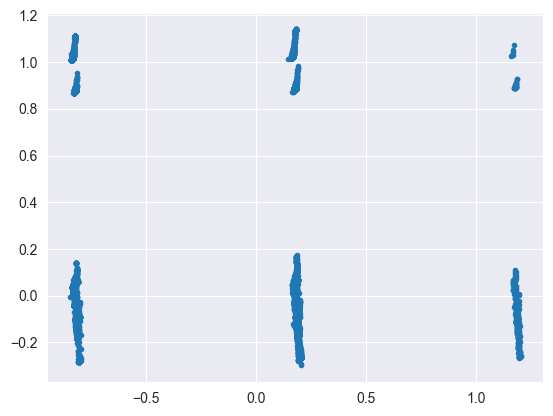

In [9]:
from sklearn.decomposition import PCA
# Visualizing data with PCA
dim_reducer = PCA(n_components=2)
reduced_df = dim_reducer.fit_transform(stream_quality_df)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], marker='.')
plt.show()

In [10]:
# Splitting data to X and Y
Y_train = stream_quality_df['stream_quality']
X_train = stream_quality_df.drop(['stream_quality'], axis=1)

Y_test = stream_quality_test['stream_quality']
X_test = stream_quality_test.drop(['stream_quality'], axis=1)

### Feature selection with Lasso

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train,Y_train)
y_pred = lasso.predict(X_test)
print("MSE on testset:", mean_squared_error(Y_test, y_pred))

MSE on testset: 0.06029186327204236


### Classification task

In [42]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l2').fit(X_train,Y_train)
y_pred = logistic.predict(X_test)
y_pred_train = logistic.predict(X_train)
print('Accuracy on testset', accuracy_score(Y_test, y_pred))
print('Precision on testset', precision_score(Y_test, y_pred))
print('Recall on testset', recall_score(Y_test,y_pred))
print('\nAccuracy on trainset', accuracy_score(Y_train, y_pred_train))
print('Precision on trainset', precision_score(Y_train, y_pred_train))
print('Recall on trainset', recall_score(Y_train,y_pred_train))

Accuracy on testset 0.9367969917404226
Precision on testset 0.5249247239879559
Recall on testset 0.1999490251051357

Accuracy on trainset 0.9447748492271971
Precision on trainset 0.8499154636493692
Recall on trainset 0.23478479557375873


In [43]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier().fit(X_train,Y_train)
y_pred = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)
print('Accuracy on testset', accuracy_score(Y_test, y_pred))
print('Precision on testset', precision_score(Y_test, y_pred))
print('Recall on testset', recall_score(Y_test,y_pred))
print('\nAccuracy on trainset', accuracy_score(Y_train, y_pred_train))
print('Precision on trainset', precision_score(Y_train, y_pred_train))
print('Recall on trainset', recall_score(Y_train,y_pred_train))

Accuracy on testset 0.9393627153155224
Precision on testset 0.6274509803921569
Recall on testset 0.14476870141455334

Accuracy on trainset 0.9436434383085899
Precision on trainset 0.9247367512515104
Recall on trainset 0.1924624559890781


RidgeClassifier and LogisticRegression give us similar results. Models work well.

In [44]:
#Let's see the results of cross validation score
from sklearn.model_selection import cross_val_score
print('Lasso cross validation score:', cross_val_score(lasso, X_test,Y_test, cv=3))
print('Logistic Regression cross validation score:', cross_val_score(logistic, X_test,Y_test, cv=3))
print('Ridge Classifier cross validation score:', cross_val_score(ridge, X_test,Y_test, cv=3))

Lasso cross validation score: [-0.00545202 -0.00371694 -0.0120003 ]
Logistic Regression cross validation score: [0.93998695 0.9407505  0.93874233]
Ridge Classifier cross validation score: [0.93938349 0.93977758 0.9385576 ]


### Removal of outliers

In [45]:
#loading data
stream_quality_df = pd.read_csv('stream_quality_data/train_data.csv')
stream_quality_test = pd.read_csv('stream_quality_data/test_data.csv')

In [46]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest()
X = stream_quality_df.iloc[:, :8]
iforest.fit(X)
pred = iforest.predict(X)

In [47]:
outliers = stream_quality_df[pred == -1]
stream_quality_df_valid = stream_quality_df[pred != -1]

print("Original Samples : ",stream_quality_df.shape)
print("Number of Outliers : ", outliers.shape)
print("Number of Normal Samples : ", stream_quality_df_valid.shape)

Original Samples :  (406572, 12)
Number of Outliers :  (39248, 12)
Number of Normal Samples :  (367324, 12)


In [48]:
# data preprocessing
stream_quality_df, stream_quality_test = LabelEncoderforClassification(stream_quality_df,stream_quality_test)
stream_quality_df, stream_quality_test = NumericalEncoderforClassification(stream_quality_df, stream_quality_test)
Y_train = stream_quality_df['stream_quality']
X_train = stream_quality_df.drop(['stream_quality'], axis=1)
Y_test = stream_quality_test['stream_quality']
X_test = stream_quality_test.drop(['stream_quality'], axis=1)

In [49]:
LogisticRegressionFunction(X_train, Y_train, X_test, Y_test)


LogisticRegression
Accuracy on testset 0.9367969917404226
Precision on testset 0.5249247239879559
Recall on testset 0.1999490251051357

Accuracy on trainset 0.9447748492271971
Precision on trainset 0.8499154636493692
Recall on trainset 0.23478479557375873


In [50]:
RidgeClassifierFunction(X_train, Y_train, X_test, Y_test)


RidgeClassifier
Accuracy on testset 0.9393627153155224
Precision on testset 0.6274509803921569
Recall on testset 0.14476870141455334

Accuracy on trainset 0.9436434383085899
Precision on trainset 0.9247367512515104
Recall on trainset 0.1924624559890781


### Balancing of Data

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train,Y_train)
print('X_train shape:', X_train.shape)
print('X_train resampled shape:', X_train_resampled.shape)

X_train shape: (406572, 11)
X_train resampled shape: (757476, 11)


### Classification task with balanced and outliers free data

In [52]:
LogisticRegressionFunction(X_train_resampled, Y_train_resampled, X_test, Y_test)


LogisticRegression
Accuracy on testset 0.8512413996945762
Precision on testset 0.23000289146492128
Recall on testset 0.5575379125780553

Accuracy on trainset 0.7222921914357683
Precision on trainset 0.862835348115586
Recall on trainset 0.5286187285141708


In [53]:
RidgeClassifierFunction(X_train_resampled, Y_train_resampled, X_test, Y_test)


RidgeClassifier
Accuracy on testset 0.8570707236572029
Precision on testset 0.2367500894799152
Recall on testset 0.5479164011724226

Accuracy on trainset 0.7237800273540019
Precision on trainset 0.859626939135748
Recall on trainset 0.5349080366902714
